In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd drive/MyDrive

/content/drive/MyDrive


In [45]:
sentinels_data = pd.read_csv("b66f03cd-006a-4554-8d83-2461ad7c1f76.csv")

In [46]:
sentinels_data.columns

Index(['Match Id', 'Series Id', 'Event Name', 'Map Name', 'Team 1 Id',
       'Team 1 Name', 'Team 2 Id', 'Team 2 Name',
       'Attacking First Team Number', 'Team 1 Score', 'Team 2 Score',
       'Team 1 Score At Half', 'Team 2 Score At Half', 'Team 1 Pistol Wins',
       'Team 1 Attacking Pistol Wins', 'Team 1 Defending Pistol Wins',
       'Team 1 Attacking Wins', 'Team 1 Attacking Losses',
       'Team 1 Defending Wins', 'Team 1 Defending Losses',
       'Team 2 Pistol Wins', 'Team 2 Attacking Pistol Wins',
       'Team 2 Defending Pistol Wins', 'Team 2 Attacking Wins',
       'Team 2 Attacking Losses', 'Team 2 Defending Wins',
       'Team 2 Defending Losses', 'Win Condition', 'Date', 'Team 1 Player Ids',
       'Team 2 Player Ids', 'Team 1 Agents', 'Team 2 Agents', 'Total Count'],
      dtype='object')

In [47]:
sentinels_data = sentinels_data.drop(['Team 1 Id', 'Team 2 Id', 'Series Id','Date','Team 1 Player Ids', 'Team 2 Player Ids', 'Total Count'],axis=1)

In [48]:
sentinels_data.columns

Index(['Match Id', 'Event Name', 'Map Name', 'Team 1 Name', 'Team 2 Name',
       'Attacking First Team Number', 'Team 1 Score', 'Team 2 Score',
       'Team 1 Score At Half', 'Team 2 Score At Half', 'Team 1 Pistol Wins',
       'Team 1 Attacking Pistol Wins', 'Team 1 Defending Pistol Wins',
       'Team 1 Attacking Wins', 'Team 1 Attacking Losses',
       'Team 1 Defending Wins', 'Team 1 Defending Losses',
       'Team 2 Pistol Wins', 'Team 2 Attacking Pistol Wins',
       'Team 2 Defending Pistol Wins', 'Team 2 Attacking Wins',
       'Team 2 Attacking Losses', 'Team 2 Defending Wins',
       'Team 2 Defending Losses', 'Win Condition', 'Team 1 Agents',
       'Team 2 Agents'],
      dtype='object')

In [89]:
reworked_data = sentinels_data.copy()

reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Opponent'] = sentinels_data['Team 2 Name']

reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Sentinels Score at Half'] = sentinels_data['Team 1 Score At Half']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Sentinels Score'] = sentinels_data['Team 1 Score']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Sentinels Pistol Wins'] = sentinels_data['Team 1 Pistol Wins']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Sentinels Attacking Pistol Wins'] = sentinels_data['Team 1 Attacking Pistol Wins']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Sentinels Defending Pistol Wins'] = sentinels_data['Team 1 Defending Pistol Wins']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Sentinels Attacking Wins'] = sentinels_data['Team 1 Attacking Wins']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Sentinels Defending Wins'] = sentinels_data['Team 1 Defending Wins']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Sentinels Attacking Losses'] = sentinels_data['Team 1 Attacking Losses']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Sentinels Defending Losses'] = sentinels_data['Team 1 Defending Losses']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Sentinels Agent Combo'] = sentinels_data['Team 1 Agents']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Opponent Score at Half'] = sentinels_data['Team 2 Score At Half']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Opponent Score'] = sentinels_data['Team 2 Score']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Opponent Pistol Wins'] = sentinels_data['Team 2 Pistol Wins']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Opponent Attacking Pistol Wins'] = sentinels_data['Team 2 Attacking Pistol Wins']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Opponent Defending Pistol Wins'] = sentinels_data['Team 2 Defending Pistol Wins']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Opponent Attacking Wins'] = sentinels_data['Team 2 Attacking Wins']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Opponent Defending Wins'] = sentinels_data['Team 2 Defending Wins']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Opponent Attacking Losses'] = sentinels_data['Team 2 Attacking Losses']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Opponent Defending Losses'] = sentinels_data['Team 2 Defending Losses']
reworked_data.loc[sentinels_data['Team 1 Name'] == 'Sentinels', 'Opponent Agent Combo'] = sentinels_data['Team 2 Agents']
reworked_data.loc[(sentinels_data['Attacking First Team Number'] == 1) & (sentinels_data['Team 1 Name'] == 'Sentinels'), 'Attacking Team'] = 'Sentinels'
reworked_data.loc[(sentinels_data['Attacking First Team Number'] == 2) & (sentinels_data['Team 2 Name'] == 'Sentinels'), 'Attacking Team'] = 'Sentinels'
reworked_data.loc[(sentinels_data['Attacking First Team Number'] == 1) & (sentinels_data['Team 1 Name'] != 'Sentinels'), 'Attacking Team'] = sentinels_data['Team 1 Name']
reworked_data.loc[(sentinels_data['Attacking First Team Number'] == 2) & (sentinels_data['Team 2 Name'] != 'Sentinels'), 'Attacking Team'] = sentinels_data['Team 2 Name']

reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Opponent'] = sentinels_data['Team 1 Name']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Opponent Score at Half'] = sentinels_data['Team 1 Score At Half']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Opponent Score'] = sentinels_data['Team 1 Score']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Opponent Pistol Wins'] = sentinels_data['Team 1 Pistol Wins']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Opponent Attacking Pistol Wins'] = sentinels_data['Team 1 Attacking Pistol Wins']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Opponent Defending Pistol Wins'] = sentinels_data['Team 1 Defending Pistol Wins']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Opponent Attacking Wins'] = sentinels_data['Team 1 Attacking Wins']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Opponent Defending Wins'] = sentinels_data['Team 1 Defending Wins']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Opponent Attacking Losses'] = sentinels_data['Team 1 Attacking Losses']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Opponent Defending Losses'] = sentinels_data['Team 1 Defending Losses']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Opponent Agent Combo'] = sentinels_data['Team 1 Agents']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Sentinels Score at Half'] = sentinels_data['Team 2 Score At Half']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Sentinels Score'] = sentinels_data['Team 2 Score']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Sentinels Pistol Wins'] = sentinels_data['Team 2 Pistol Wins']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Sentinels Attacking Pistol Wins'] = sentinels_data['Team 2 Attacking Pistol Wins']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Sentinels Defending Pistol Wins'] = sentinels_data['Team 2 Defending Pistol Wins']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Sentinels Attacking Wins'] = sentinels_data['Team 2 Attacking Wins']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Sentinels Defending Wins'] = sentinels_data['Team 2 Defending Wins']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Sentinels Attacking Losses'] = sentinels_data['Team 2 Attacking Losses']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Sentinels Defending Losses'] = sentinels_data['Team 2 Defending Losses']
reworked_data.loc[sentinels_data['Team 2 Name'] == 'Sentinels', 'Sentinels Agent Combo'] = sentinels_data['Team 2 Agents']

In [90]:
reworked_data.isnull().sum().sum()

1

In [91]:
null_values = reworked_data.isna().sum()

In [92]:
null_values

Match Id                           0
Event Name                         0
Map Name                           0
Team 1 Name                        0
Team 2 Name                        0
Attacking First Team Number        0
Team 1 Score                       0
Team 2 Score                       0
Team 1 Score At Half               0
Team 2 Score At Half               0
Team 1 Pistol Wins                 0
Team 1 Attacking Pistol Wins       0
Team 1 Defending Pistol Wins       0
Team 1 Attacking Wins              0
Team 1 Attacking Losses            0
Team 1 Defending Wins              0
Team 1 Defending Losses            0
Team 2 Pistol Wins                 0
Team 2 Attacking Pistol Wins       0
Team 2 Defending Pistol Wins       0
Team 2 Attacking Wins              0
Team 2 Attacking Losses            0
Team 2 Defending Wins              0
Team 2 Defending Losses            0
Win Condition                      1
Team 1 Agents                      0
Team 2 Agents                      0
H

In [93]:
reworked_data.columns

Index(['Match Id', 'Event Name', 'Map Name', 'Team 1 Name', 'Team 2 Name',
       'Attacking First Team Number', 'Team 1 Score', 'Team 2 Score',
       'Team 1 Score At Half', 'Team 2 Score At Half', 'Team 1 Pistol Wins',
       'Team 1 Attacking Pistol Wins', 'Team 1 Defending Pistol Wins',
       'Team 1 Attacking Wins', 'Team 1 Attacking Losses',
       'Team 1 Defending Wins', 'Team 1 Defending Losses',
       'Team 2 Pistol Wins', 'Team 2 Attacking Pistol Wins',
       'Team 2 Defending Pistol Wins', 'Team 2 Attacking Wins',
       'Team 2 Attacking Losses', 'Team 2 Defending Wins',
       'Team 2 Defending Losses', 'Win Condition', 'Team 1 Agents',
       'Team 2 Agents', 'Halftime Outcome', 'Opponent',
       'Sentinels Score at Half', 'Sentinels Score', 'Sentinels Pistol Wins',
       'Sentinels Attacking Pistol Wins', 'Sentinels Defending Pistol Wins',
       'Sentinels Attacking Wins', 'Sentinels Defending Wins',
       'Sentinels Attacking Losses', 'Sentinels Defending Losse

In [94]:
reworked_data = reworked_data.drop(['Team 1 Score', 'Team 2 Score','Attacking First Team Number',
       'Team 1 Score At Half', 'Team 2 Score At Half', 'Team 1 Pistol Wins',
       'Team 1 Attacking Pistol Wins', 'Team 1 Defending Pistol Wins',
       'Team 1 Attacking Wins', 'Team 1 Attacking Losses',
       'Team 1 Defending Wins', 'Team 1 Defending Losses',
       'Team 2 Pistol Wins', 'Team 2 Attacking Pistol Wins',
       'Team 2 Defending Pistol Wins', 'Team 2 Attacking Wins',
       'Team 2 Attacking Losses', 'Team 2 Defending Wins',
       'Team 2 Defending Losses', 'Win Condition','Team 2 Agents'], axis=1)

In [95]:
reworked_data = reworked_data.drop(['Team 2 Name','Team 1 Name'], axis=1)

In [96]:
reworked_data = reworked_data.drop(['Team 1 Agents'], axis=1)

In [100]:
len(reworked_data.columns)

26

In [102]:
reworked_data.head()

,Match Id,Event Name,Map Name,Halftime Outcome,Opponent,Sentinels Score at Half,Sentinels Score,Sentinels Pistol Wins,Sentinels Attacking Pistol Wins,Sentinels Defending Pistol Wins,...,Opponent Score,Opponent Pistol Wins,Opponent Attacking Pistol Wins,Opponent Defending Pistol Wins,Opponent Attacking Wins,Opponent Defending Wins,Opponent Attacking Losses,Opponent Defending Losses,Opponent Agent Combo,Attacking Team
0,44888,VALORANT Champions 2021 - Group Stage,Split,Lost while leading at halftime,KRÜ Esports,8.0,11.0,0.0,0.0,0.0,...,13.0,2.0,1.0,1.0,9.0,4.0,3.0,8.0,"Raze,Viper,Jett,Skye,Astra",Sentinels
1,44887,VALORANT Champions 2021 - Group Stage,Haven,Lost while leading at halftime,KRÜ Esports,8.0,11.0,0.0,0.0,0.0,...,13.0,2.0,1.0,1.0,9.0,4.0,3.0,8.0,"Sova,Killjoy,Reyna,Jett,Astra",Sentinels
2,44886,VALORANT Champions 2021 - Group Stage,Fracture,Lost while leading at halftime,KRÜ Esports,9.0,13.0,2.0,1.0,1.0,...,7.0,0.0,0.0,0.0,3.0,4.0,9.0,4.0,"Breach,Cypher,Viper,Jett,Astra",KRÜ Esports
3,44851,VALORANT Champions 2021 - Group Stage,Split,Lost while leading at halftime,Team Liquid,6.0,10.0,1.0,0.0,1.0,...,13.0,1.0,0.0,1.0,7.0,6.0,4.0,6.0,"Breach,Raze,Viper,Reyna,Astra",Sentinels
4,44850,VALORANT Champions 2021 - Group Stage,Bind,Lost while leading at halftime,Team Liquid,10.0,13.0,2.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,2.0,3.0,10.0,"Sova,Viper,Jett,Astra,KAY/O",Sentinels


In [111]:
cols_new = ['Match Id',
 'Event Name',
 'Map Name',
 'Opponent',
 'Winner',
'Attacking Team',
 'Sentinels Score',
 'Opponent Score',
 'Sentinels Score at Half',
 'Opponent Score at Half',
 'Sentinels Pistol Wins',
 'Opponent Pistol Wins',
 'Sentinels Attacking Pistol Wins',
 'Opponent Attacking Pistol Wins',
 'Sentinels Defending Pistol Wins',
 'Opponent Defending Pistol Wins',
 'Sentinels Attacking Wins',
 'Opponent Attacking Wins',
 'Sentinels Defending Wins',
 'Opponent Defending Wins',
 'Sentinels Attacking Losses',
 'Opponent Attacking Losses',
 'Sentinels Defending Losses',
 'Opponent Defending Losses',
 'Sentinels Agent Combo',
 'Opponent Agent Combo']

In [104]:
len(cols_new)

26

In [105]:
reworked_data.loc[reworked_data['Sentinels Score'] > reworked_data['Opponent Score'], 'Winner'] = "Sentinels"
reworked_data.loc[reworked_data['Sentinels Score'] < reworked_data['Opponent Score'], 'Winner'] = reworked_data['Opponent']

In [106]:
cols = list(reworked_data.columns)

In [107]:
cols

['Match Id',
 'Event Name',
 'Map Name',
 'Halftime Outcome',
 'Opponent',
 'Sentinels Score at Half',
 'Sentinels Score',
 'Sentinels Pistol Wins',
 'Sentinels Attacking Pistol Wins',
 'Sentinels Defending Pistol Wins',
 'Sentinels Attacking Wins',
 'Sentinels Defending Wins',
 'Sentinels Attacking Losses',
 'Sentinels Defending Losses',
 'Sentinels Agent Combo',
 'Opponent Score at Half',
 'Opponent Score',
 'Opponent Pistol Wins',
 'Opponent Attacking Pistol Wins',
 'Opponent Defending Pistol Wins',
 'Opponent Attacking Wins',
 'Opponent Defending Wins',
 'Opponent Attacking Losses',
 'Opponent Defending Losses',
 'Opponent Agent Combo',
 'Attacking Team',
 'Winner']

In [112]:
reworked_data = reworked_data[cols_new]
reworked_data.head()

,Match Id,Event Name,Map Name,Opponent,Winner,Attacking Team,Sentinels Score,Opponent Score,Sentinels Score at Half,Opponent Score at Half,...,Sentinels Attacking Wins,Opponent Attacking Wins,Sentinels Defending Wins,Opponent Defending Wins,Sentinels Attacking Losses,Opponent Attacking Losses,Sentinels Defending Losses,Opponent Defending Losses,Sentinels Agent Combo,Opponent Agent Combo
0,44888,VALORANT Champions 2021 - Group Stage,Split,KRÜ Esports,KRÜ Esports,Sentinels,11.0,13.0,8.0,4.0,...,8.0,9.0,3.0,4.0,4.0,3.0,9.0,8.0,"Viper,Sage,Jett,Skye,Astra","Raze,Viper,Jett,Skye,Astra"
1,44887,VALORANT Champions 2021 - Group Stage,Haven,KRÜ Esports,KRÜ Esports,Sentinels,11.0,13.0,8.0,4.0,...,8.0,9.0,3.0,4.0,4.0,3.0,9.0,8.0,"Cypher,Sova,Jett,Skye,Astra","Sova,Killjoy,Reyna,Jett,Astra"
2,44886,VALORANT Champions 2021 - Group Stage,Fracture,KRÜ Esports,Sentinels,KRÜ Esports,13.0,7.0,9.0,3.0,...,4.0,3.0,9.0,4.0,4.0,9.0,3.0,4.0,"Breach,Killjoy,Viper,Jett,Skye","Breach,Cypher,Viper,Jett,Astra"
3,44851,VALORANT Champions 2021 - Group Stage,Split,Team Liquid,Team Liquid,Sentinels,10.0,13.0,6.0,6.0,...,6.0,7.0,4.0,6.0,6.0,4.0,7.0,6.0,"Viper,Sage,Jett,Skye,Astra","Breach,Raze,Viper,Reyna,Astra"
4,44850,VALORANT Champions 2021 - Group Stage,Bind,Team Liquid,Sentinels,Sentinels,13.0,2.0,10.0,2.0,...,10.0,0.0,3.0,2.0,2.0,3.0,0.0,10.0,"Sova,Viper,Jett,Skye,Astra","Sova,Viper,Jett,Astra,KAY/O"


In [70]:
reworked_data['Halftime Outcome'] = 'Lost while leading at halftime'
reworked_data.loc[(reworked_data['Sentinels Score at Half'] > reworked_data['Opponent Score at Half']) & (reworked_data['Winner'] != 'Sentinels'), 'Halftime Outcome'] = 'Lost while leading at halftime'
reworked_data.loc[(reworked_data['Sentinels Score at Half'] > reworked_data['Opponent Score at Half']) & (reworked_data['Winner'] == 'Sentinels'), 'Halftime Outcome'] = 'Won after leading at halftime'
reworked_data.loc[(reworked_data['Sentinels Score at Half'] < reworked_data['Opponent Score at Half']) & (reworked_data['Winner'] == 'Sentinels'), 'Halftime Outcome'] = 'Comeback win after trailing at halftime'

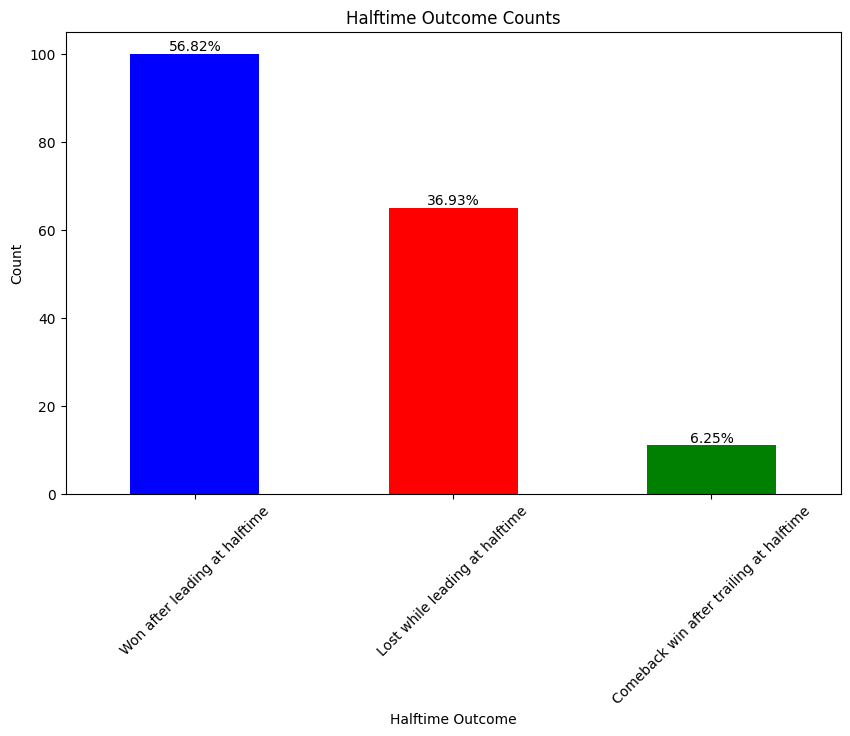

In [71]:
outcome_counts = reworked_data['Halftime Outcome'].value_counts()
colors = ['blue', 'red', 'green']
ax = outcome_counts.plot(kind='bar', figsize=(10, 6), color=colors)
total_count = outcome_counts.sum()
for i, count in enumerate(outcome_counts):
    percentage = (count / total_count) * 100
    ax.annotate(f'{percentage:.2f}%', (i, count), ha='center', va='bottom')

plt.title('Halftime Outcome Counts')
plt.xlabel('Halftime Outcome')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [74]:
reworked_data.columns

Index(['Match Id', 'Event Name', 'Map Name', 'Opponent', 'Winner',
       'Sentinels Score', 'Opponent Score', 'Attacking First Team Number',
       'Sentinels Score at Half', 'Opponent Score at Half',
       'Sentinels Pistol Wins', 'Opponent Pistol Wins',
       'Sentinels Attacking Pistol Wins', 'Opponent Attacking Pistol Wins',
       'Sentinels Defending Pistol Wins', 'Opponent Defending Pistol Wins',
       'Sentinels Attacking Wins', 'Opponent Attacking Wins',
       'Sentinels Defending Wins', 'Opponent Defending Wins',
       'Sentinels Attacking Losses', 'Opponent Attacking Losses',
       'Sentinels Defending Losses', 'Opponent Defending Losses',
       'Sentinels Agent Combo', 'Opponent Agent Combo',
       'Failed to Win After Pistol', 'Won the game after Win After Pistol',
       'Halftime Outcome', 'Attacking Team'],
      dtype='object')

In [113]:
attacking_start_wins = reworked_data[(reworked_data['Attacking Team'] == 'Sentinels') & (reworked_data['Sentinels Attacking Pistol Wins'] == 1)]
defending_start_wins = reworked_data[(reworked_data['Attacking Team'] != 'Sentinels') & (reworked_data['Sentinels Defending Pistol Wins'] == 1)]
percentage_attacking_start = (len(attacking_start_wins[attacking_start_wins['Sentinels Attacking Wins'] > attacking_start_wins['Opponent Defending Wins']]) / len(attacking_start_wins)) * 100
percentage_defending_start = (len(defending_start_wins[defending_start_wins['Sentinels Defending Wins'] > defending_start_wins['Opponent Attacking Wins']]) / len(defending_start_wins)) * 100
print(f"Percentage of times Sentinels won the half when attacking and winning the pistol: {percentage_attacking_start:.2f}%")
print(f"Percentage of times Sentinels won the half when defending and winning the pistol: {percentage_defending_start:.2f}%")

Percentage of times Sentinels won the half when attacking and winning the pistol: 81.40%
Percentage of times Sentinels won the half when defending and winning the pistol: 71.43%


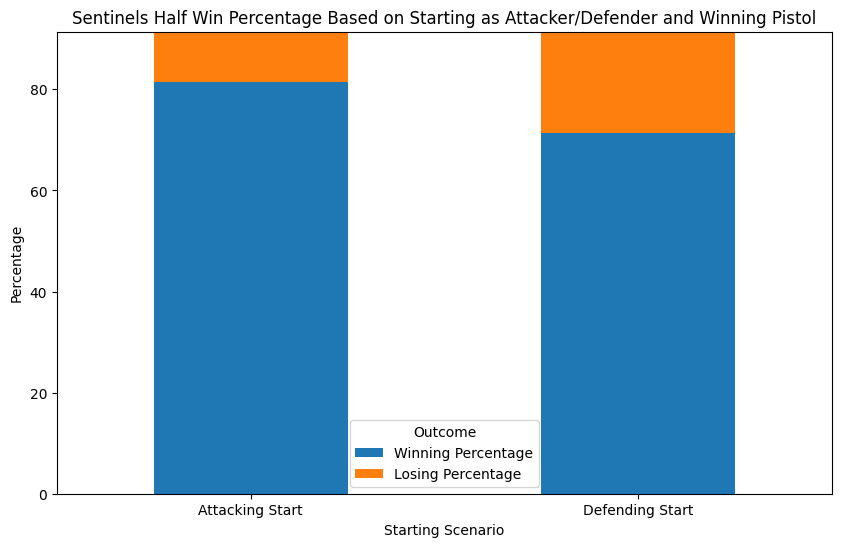

In [119]:
pistol_conversion = {'Scenario': ['Attacking Start', 'Defending Start'],
        'Winning Percentage': [percentage_attacking_start, percentage_defending_start],
        'Losing Percentage': [100 - percentage_attacking_start, 100 - percentage_defending_start]}

max_percentage = max(percentage_attacking_start, percentage_defending_start)
pistol_conversion_df = pd.DataFrame(pistol_conversion)
ax = pistol_conversion_df.plot(kind='bar', stacked=True, figsize=(10, 6), ylim=(0, max_percentage + 10))
plt.title('Sentinels Half Win Percentage Based on Starting as Attacker/Defender and Winning Pistol')
plt.xlabel('Starting Scenario')
plt.ylabel('Percentage')
plt.xticks(range(len(pistol_conversion_df)), pistol_conversion_df['Scenario'],rotation=0)
plt.legend(title='Outcome', labels=['Winning Percentage', 'Losing Percentage'])
plt.show()

In [123]:
def sort_agents(agent_combo):
    agents = [agent.strip() for agent in agent_combo.split(',')]
    sorted_agents = ', '.join(sorted(agents))
    return sorted_agents

In [124]:
reworked_data['Sentinels Agent Combo'] = reworked_data['Sentinels Agent Combo'].apply(sort_agents)
reworked_data['Opponent Agent Combo'] = reworked_data['Opponent Agent Combo'].apply(sort_agents)

<ipython-input-124-1e51107000d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reworked_data['Sentinels Agent Combo'] = reworked_data['Sentinels Agent Combo'].apply(sort_agents)
<ipython-input-124-1e51107000d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reworked_data['Opponent Agent Combo'] = reworked_data['Opponent Agent Combo'].apply(sort_agents)


In [125]:
reworked_data.head()

,Match Id,Event Name,Map Name,Opponent,Winner,Attacking Team,Sentinels Score,Opponent Score,Sentinels Score at Half,Opponent Score at Half,...,Sentinels Attacking Wins,Opponent Attacking Wins,Sentinels Defending Wins,Opponent Defending Wins,Sentinels Attacking Losses,Opponent Attacking Losses,Sentinels Defending Losses,Opponent Defending Losses,Sentinels Agent Combo,Opponent Agent Combo
0,44888,VALORANT Champions 2021 - Group Stage,Split,KRÜ Esports,KRÜ Esports,Sentinels,11.0,13.0,8.0,4.0,...,8.0,9.0,3.0,4.0,4.0,3.0,9.0,8.0,"Astra, Jett, Sage, Skye, Viper","Astra, Jett, Raze, Skye, Viper"
1,44887,VALORANT Champions 2021 - Group Stage,Haven,KRÜ Esports,KRÜ Esports,Sentinels,11.0,13.0,8.0,4.0,...,8.0,9.0,3.0,4.0,4.0,3.0,9.0,8.0,"Astra, Cypher, Jett, Skye, Sova","Astra, Jett, Killjoy, Reyna, Sova"
2,44886,VALORANT Champions 2021 - Group Stage,Fracture,KRÜ Esports,Sentinels,KRÜ Esports,13.0,7.0,9.0,3.0,...,4.0,3.0,9.0,4.0,4.0,9.0,3.0,4.0,"Breach, Jett, Killjoy, Skye, Viper","Astra, Breach, Cypher, Jett, Viper"
3,44851,VALORANT Champions 2021 - Group Stage,Split,Team Liquid,Team Liquid,Sentinels,10.0,13.0,6.0,6.0,...,6.0,7.0,4.0,6.0,6.0,4.0,7.0,6.0,"Astra, Jett, Sage, Skye, Viper","Astra, Breach, Raze, Reyna, Viper"
4,44850,VALORANT Champions 2021 - Group Stage,Bind,Team Liquid,Sentinels,Sentinels,13.0,2.0,10.0,2.0,...,10.0,0.0,3.0,2.0,2.0,3.0,0.0,10.0,"Astra, Jett, Skye, Sova, Viper","Astra, Jett, KAY/O, Sova, Viper"


In [126]:
sentinels_wins = reworked_data[reworked_data['Winner'] == 'Sentinels']
agent_combination_counts = sentinels_wins['Sentinels Agent Combo'].value_counts()
best_agent_combination = agent_combination_counts.idxmax()
highest_win_count = agent_combination_counts.max()
print(f"The best combination of agents that helped Sentinels win the most games is: {best_agent_combination}")
print(f"Number of wins with this combination: {highest_win_count}")

The best combination of agents that helped Sentinels win the most games is: Cypher, Jett, Omen, Phoenix, Sova
Number of wins with this combination: 35


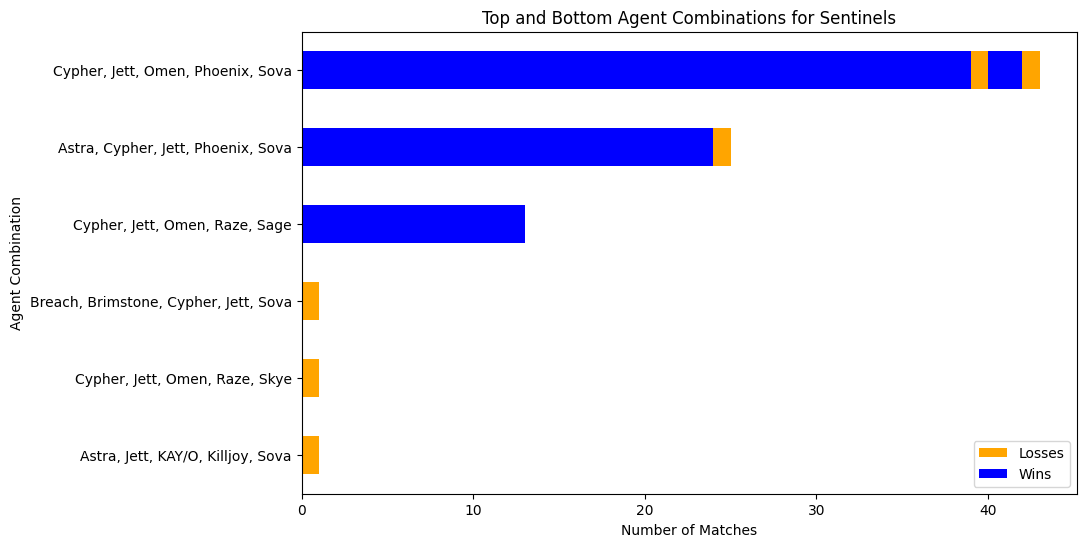

In [132]:
agent_combination_counts = reworked_data.groupby('Sentinels Agent Combo')['Winner'].value_counts().unstack(fill_value=0)
top_combinations = agent_combination_counts.sort_values(by=['Sentinels'], ascending=[False]).head(3)
bottom_combinations = agent_combination_counts.sort_values(by=['Sentinels'], ascending=[True]).head(3)
combinations_to_plot = pd.concat([top_combinations, bottom_combinations])
ax = combinations_to_plot.plot(kind='barh', stacked=True, figsize=(10, 6), color=['orange', 'blue'])

plt.title('Top and Bottom Agent Combinations for Sentinels')
plt.xlabel('Number of Matches')
plt.ylabel('Agent Combination')
plt.legend(['Losses', 'Wins'])
plt.gca().invert_yaxis()

plt.show()

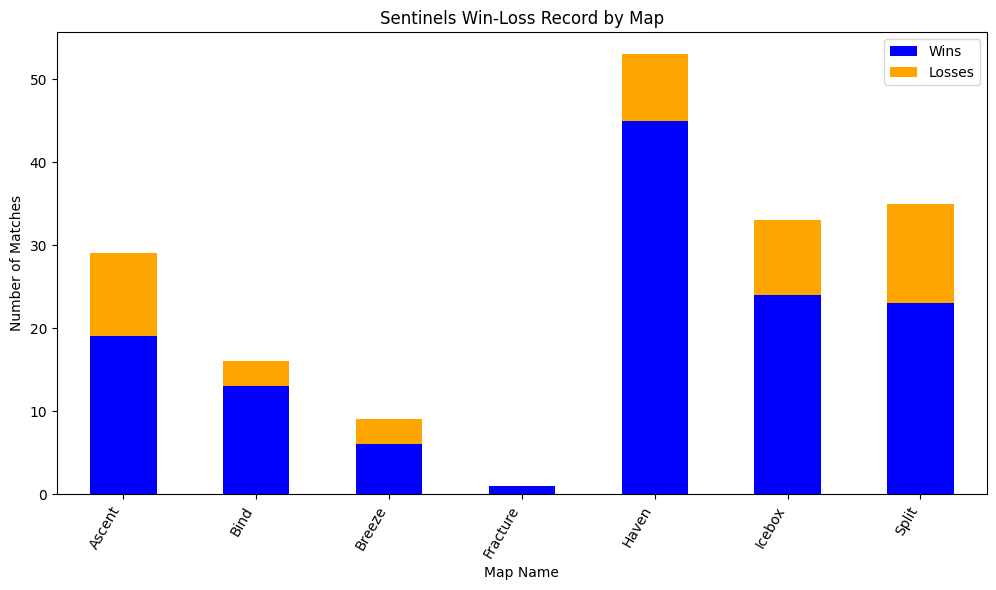

In [135]:
sentinels_map_win_loss = reworked_data[reworked_data['Winner'] == 'Sentinels'].groupby('Map Name').size().reset_index(name='Wins')
sentinels_map_loss = reworked_data[reworked_data['Winner'] != 'Sentinels'].groupby('Map Name').size().reset_index(name='Losses')
map_win_loss_counts = sentinels_map_win_loss.merge(sentinels_map_loss, on='Map Name', how='outer').fillna(0)
ax = map_win_loss_counts.plot(x='Map Name', kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'orange'])
plt.title('Sentinels Win-Loss Record by Map')
plt.xlabel('Map Name')
plt.ylabel('Number of Matches')
plt.xticks(rotation=60, ha='right')
plt.legend(['Wins', 'Losses'])
plt.show()

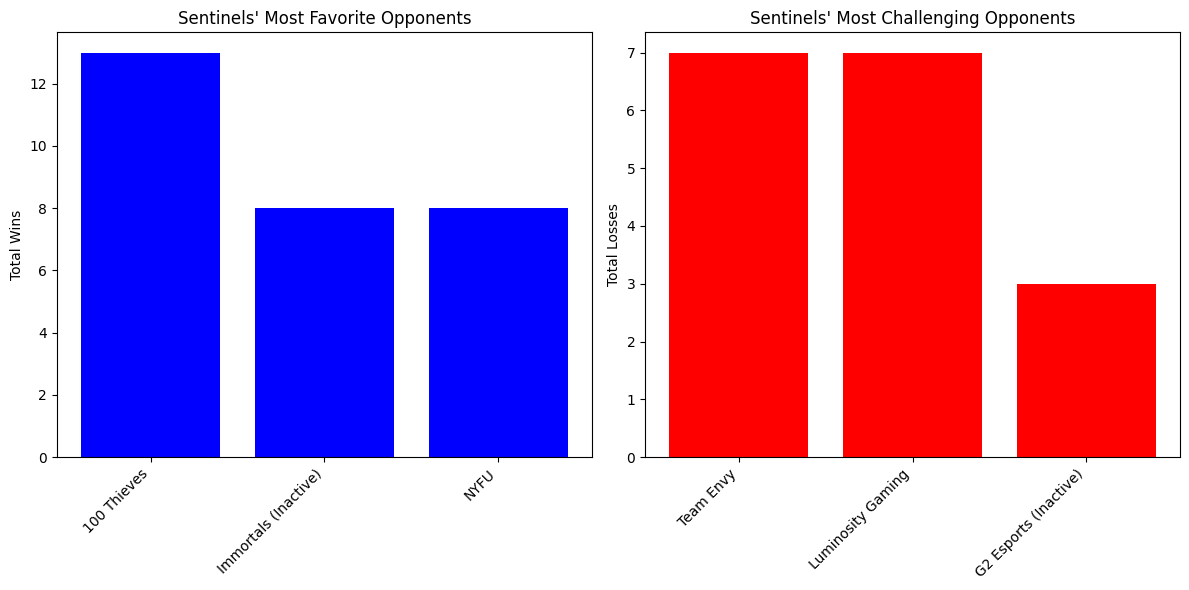

In [146]:
unique_teams = reworked_data['Opponent'].unique()
wins_against_opponents = {}
losses_against_opponents = {}
for team in unique_teams:
    wins = len(reworked_data[(reworked_data['Winner'] == 'Sentinels') & (reworked_data['Opponent'] == team)])
    losses = len(reworked_data[ (reworked_data['Winner'] != 'Sentinels') & (reworked_data['Opponent'] == team)])
    wins_against_opponents[team] = wins
    losses_against_opponents[team] = losses
wins_df = pd.DataFrame(list(wins_against_opponents.items()), columns=['Opponent', 'Total Wins'])
losses_df = pd.DataFrame(list(losses_against_opponents.items()), columns=['Opponent', 'Total Losses'])
favorite_opponents = wins_df.sort_values(by=['Total Wins'], ascending=[False]).head(3)
challenging_opponents = losses_df.sort_values(by=['Total Losses'], ascending=[False]).head(3)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(favorite_opponents['Opponent'], favorite_opponents['Total Wins'], color='blue')
plt.title('Sentinels\' Most Favorite Opponents')
plt.ylabel('Total Wins')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
plt.bar(challenging_opponents['Opponent'], challenging_opponents['Total Losses'], color='red')
plt.title('Sentinels\' Most Challenging Opponents')
plt.ylabel('Total Losses')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
